In [1]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [2]:
import tensorflow as tf
print(tf.__version__)

1.15.2


In [4]:
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np
mnist = input_data.read_data_sets('mnist/', one_hot=False)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting mnist/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting mnist/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting mnist/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting mnist/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [0]:
x_train = mnist.train.images
y_train = mnist.train.labels
x_test = mnist.test.images
y_test = mnist.test.labels

In [6]:
x_train.shape

(55000, 784)

In [7]:
x_test.shape

(10000, 784)

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
# plt.imshow(x_train[0])

Text(0.5, 1.0, 'Class: 7')

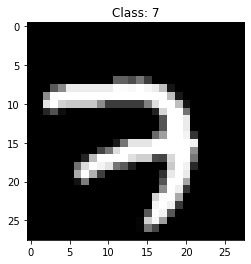

In [19]:
plt.imshow(x_train[0].reshape(28, 28), cmap='gray')
plt.title('Class: ' + str(y_train[0]))

Classifier

In [0]:
# features -> x_train
# labels -> y_train
def create_neural_net(features, labels, mode):
  # need transform features to dictionary shape, cause is the format which tensorflow wants
  # batch_size, width, height, channels(RGB or Gray)
  entry = tf.reshape(features['X'], [-1, 28,28, 1])

  # recieve [batch_size, 28, 28, 1]
  # return [batch_size, 28, 28, 32]
  convolutional1 = tf.layers.conv2d(
      inputs= entry, 
      filters= 32, 
      kernel_size=[5, 5], 
      activation=tf.nn.relu, 
      padding='same'
    )
  
  # max pool layers
  # recieve [batch_size, 28, 28, 32]
  # return [batch_size, 14, 14, 32] -> dimention was divide by half 14x14
  pooling1 = tf.layers.max_pooling2d(inputs= convolutional1, pool_size=[2,2], strides=2)
  
  # recieve [batch_size, 14, 14, 32]
  # return [batch_size, 14, 14, 64]
  convolutional2 = tf.layers.conv2d(
      inputs= pooling1, 
      filters= 64, 
      kernel_size=[5, 5], 
      activation=tf.nn.relu, 
      padding='same'
    )
  
  # recieve [batch_size, 14, 14, 32]
  # return [batch_size, 7, 7, 64] -> dimention was divide by half 7x7
  pooling1 = tf.layers.max_pooling2d(inputs= convolutional2, pool_size=[2,2], strides=2)

  # step which transform matrix in vector to feed input layer of nn
  # receive [batch_size, 7, 7, 64]
  # return [batch_size, 3136]
  flattening = tf.reshape(pooling2, [-1, 7 * 7 * 64])

  # 3136 neuron input layer -> 1024 neurons hidden layer -> 10 neurons out layer
  # receive [batch_size, 3136]
  # return [batch_size, 1024]
  dense = tf.layers.dense(inputs= flattening, units=1024, activation=tf.nn.relu)

  #dropout technique (important) avoid overfiting, some entries become zero 
  # receive [batch_size, 1024]
  # return [batch_size, 10]
  dropout = tf.layers.dropout(input=dense, rate = 0.2)

  out = tf.layers.dense(inputs=dropout, units=10)

In [23]:
classifier = tf.estimator.Estimator(model_fn= create_neural_net)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpzyrpu2ul', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fa1f2599e48>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [24]:
# first parameter go to x_train -> feature, y_train -> labels. Function create_neural_net 
function_training = tf.estimator.inputs.numpy_input_fn(x = {'X': x_train }, 
                                                       y = y_train, 
                                                       batch_size=128,
                                                       num_epochs=None,
                                                       shuffle=True
                                                       )
classifier.train(input_fn=function_training, steps= 200)

Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.


ValueError: ignored